## Data loading

### Subtask:
Load the two CSV files into pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames and display the first 5 rows of each.



In [1]:
import pandas as pd

try:
    df_exog = pd.read_csv('Exog_Campaign_eng.csv')
    df_train = pd.read_csv('train_1.csv')
    display(df_exog.head())
    display(df_train.head())
except FileNotFoundError:
    print("One or both of the CSV files were not found.")
except pd.errors.ParserError:
    print("There was an error parsing one or both of the CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Exog
0,0
1,0
2,0
3,0
4,0


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Data exploration

### Subtask:
Explore the loaded datasets to understand their characteristics.


**Reasoning**:
Explore the data by examining the shape, data types, descriptive statistics, missing values, and unique values of key columns in both dataframes.



In [2]:
# Data Shape and Types
print("df_exog shape:", df_exog.shape)
print("df_exog data types:\n", df_exog.dtypes)
print("\ndf_train shape:", df_train.shape)
print("df_train data types:\n", df_train.dtypes)

# Descriptive Statistics
print("\ndf_exog descriptive statistics:\n", df_exog.describe())
numerical_cols_train = df_train.select_dtypes(include=['number']).columns
numerical_cols_train = numerical_cols_train.drop('Page') #Exclude Page column for statistics
print("\ndf_train descriptive statistics for numerical columns (excluding 'Page'):\n", df_train[numerical_cols_train].describe())


# Missing Values
print("\ndf_exog missing values:\n", df_exog.isnull().sum())
print("\ndf_train missing values:\n", df_train.isnull().sum())

# Unique Values in 'Page' column
print("\nUnique values in 'Page' column of df_train:", df_train['Page'].nunique())

df_exog shape: (550, 1)
df_exog data types:
 Exog    int64
dtype: object

df_train shape: (145063, 551)
df_train data types:
 Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

df_exog descriptive statistics:
              Exog
count  550.000000
mean     0.098182
std      0.297831
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000


KeyError: "['Page'] not found in axis"

**Reasoning**:
The previous code block failed due to a KeyError because 'Page' was not found in the numerical columns of df_train.  I will correct the code to exclude 'Page' before calculating descriptive statistics.  Additionally, I will add code to address missing values and unique values, as well as outlier detection and data distribution. I'll also calculate correlation between date columns. Due to the large number of date columns, I will use a smaller sample for correlation analysis for performance.




df_train descriptive statistics for numerical columns (excluding 'Page'):
          2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.243230e+05  1.242470e+05  1.245190e+05  1.244090e+05  1.244040e+05   
mean   1.195857e+03  1.204004e+03  1.133676e+03  1.170437e+03  1.217769e+03   
std    7.275352e+04  7.421515e+04  6.961022e+04  7.257351e+04  7.379612e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  1.300000e+01  1.200000e+01  1.300000e+01  1.400000e+01   
50%    1.090000e+02  1.080000e+02  1.050000e+02  1.050000e+02  1.130000e+02   
75%    5.240000e+02  5.190000e+02  5.040000e+02  4.870000e+02  5.400000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.245800e+05  1.243990e+05  1.247690e+05  1.248190e+05  1.247210e+05   
mean   1.290273e+03  1.239137e+03  1.193092e+03  1.197

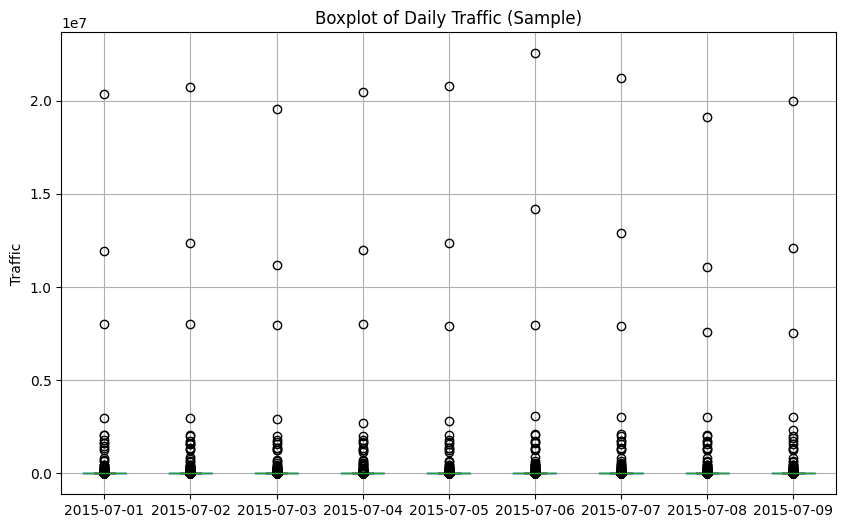

<Figure size 1000x600 with 0 Axes>

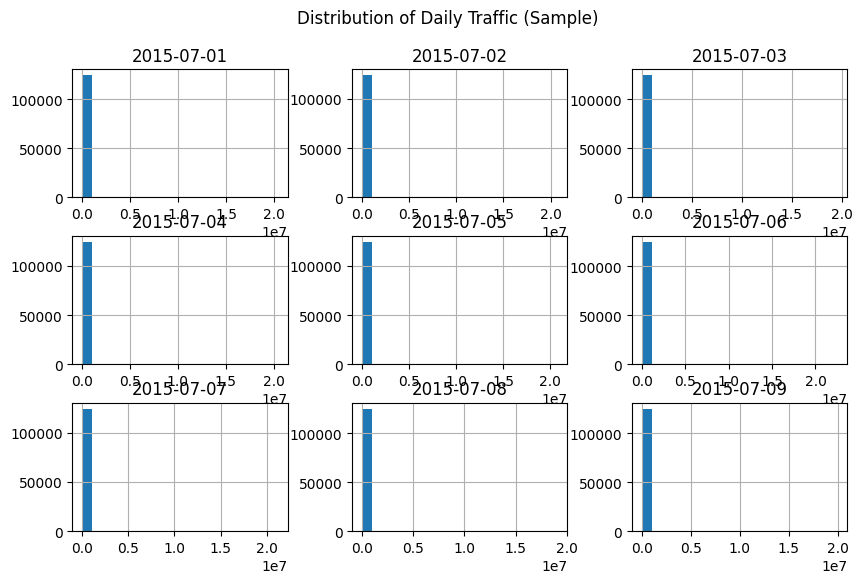

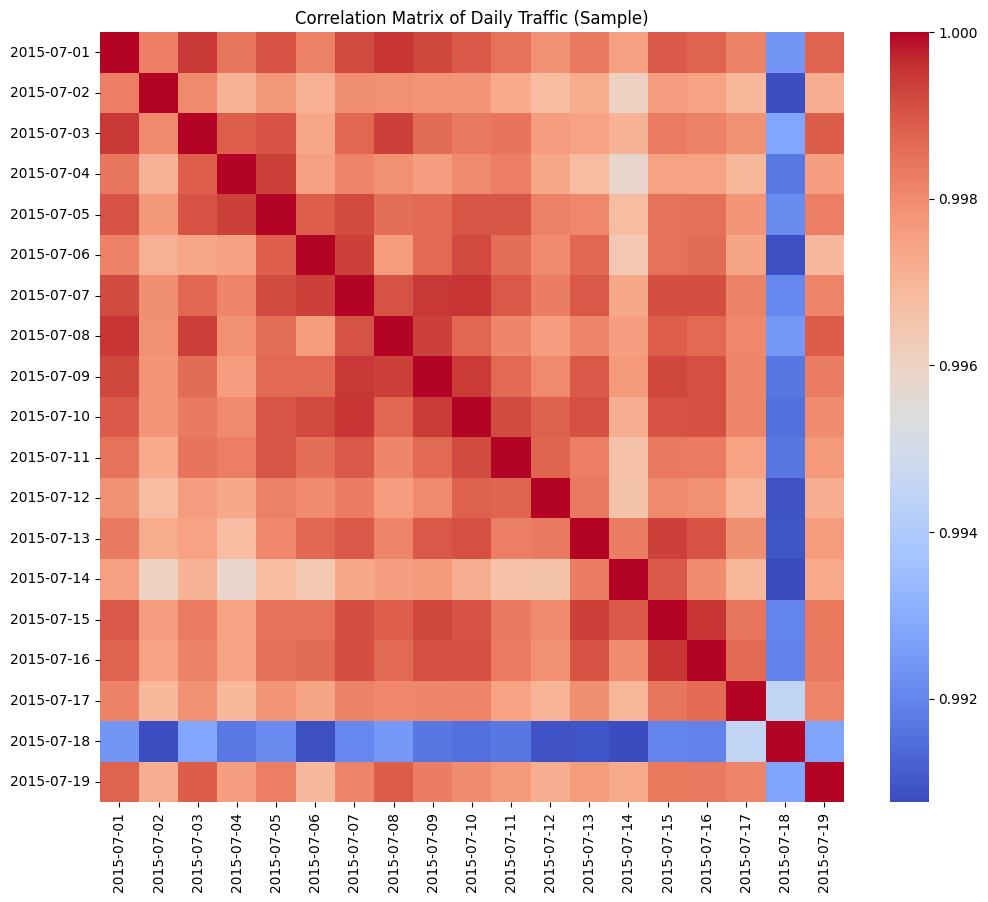

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics (Corrected)
numerical_cols_train = df_train.select_dtypes(include=['number']).columns
print("\ndf_train descriptive statistics for numerical columns (excluding 'Page'):\n", df_train[numerical_cols_train].describe())

# Missing Values
print("\ndf_exog missing values:\n", df_exog.isnull().sum())
print("\ndf_train missing values:\n", df_train.isnull().sum())

# Unique Values in 'Page' column
print("\nUnique values in 'Page' column of df_train:", df_train['Page'].nunique())

# Outlier Detection (using boxplots for a sample of date columns)
date_columns_sample = df_train.columns[1:10]  # Sample first 10 date columns
plt.figure(figsize=(10, 6))
df_train[date_columns_sample].boxplot()
plt.title("Boxplot of Daily Traffic (Sample)")
plt.ylabel("Traffic")
plt.show()

# Data Distribution (histograms for a sample of date columns)
plt.figure(figsize=(10, 6))
df_train[date_columns_sample].hist(figsize=(10,6), bins=20)
plt.suptitle("Distribution of Daily Traffic (Sample)")
plt.show()

#Correlation Analysis (using a smaller sample)
date_cols_sample = df_train.columns[1:20] # Sample first 20 date columns
correlation_matrix = df_train[date_cols_sample].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Traffic (Sample)')
plt.show()

## Data cleaning

### Subtask:
Clean the datasets `df_exog` and `df_train`.


**Reasoning**:
Fill missing values with 0, winsorize outliers in daily traffic columns, remove duplicates, and validate the cleaning process.




df_exog missing values:
 Exog    0
dtype: int64

df_train missing values:
 Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

df_train data types:
 Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

df_train descriptive statistics for numerical columns (excluding 'Page'):
           2015-07-01     2015-07-02     2015-07-03     2015-07-04  \
count  145063.000000  145063.000000  145063.000000  145063.000000   
mean      492.926784     486.097063     471.832362     489.429970   
std      1183.283913    1166.632944    1134.373182    1228.962892   
min         0.000000       0.000000       0.000000       0.000000   
25%      

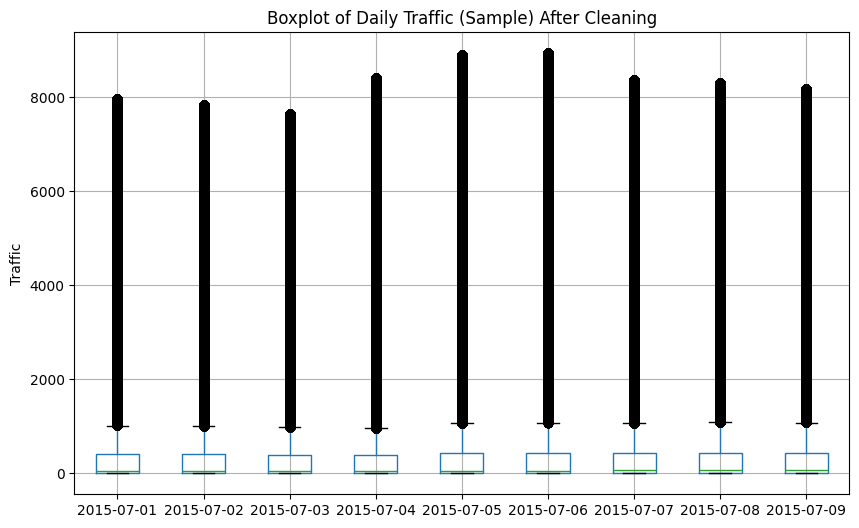

In [4]:
import numpy as np

# Fill missing values with 0
df_train.fillna(0, inplace=True)

# Winsorize outliers in daily traffic columns
for col in df_train.columns[1:]:  # Exclude the 'Page' column
    df_train[col] = np.clip(df_train[col],
                           a_min=np.percentile(df_train[col], 1),
                           a_max=np.percentile(df_train[col], 99))

# Remove duplicate rows
df_exog.drop_duplicates(inplace=True)
df_train.drop_duplicates(inplace=True)

# Data Validation
print("\ndf_exog missing values:\n", df_exog.isnull().sum())
print("\ndf_train missing values:\n", df_train.isnull().sum())

# Verify data types (no changes needed for df_exog)
print("\ndf_train data types:\n", df_train.dtypes)

# Display descriptive statistics after cleaning
print("\ndf_train descriptive statistics for numerical columns (excluding 'Page'):\n", df_train[df_train.columns[1:]].describe())

import matplotlib.pyplot as plt
# Boxplots for validation
date_columns_sample = df_train.columns[1:10]  # Sample first 10 date columns
plt.figure(figsize=(10, 6))
df_train[date_columns_sample].boxplot()
plt.title("Boxplot of Daily Traffic (Sample) After Cleaning")
plt.ylabel("Traffic")
plt.show()

## Data visualization

### Subtask:
Visualize key aspects of the cleaned datasets `df_exog` and `df_train`.


**Reasoning**:
Visualize the data using histograms, boxplots, and scatter plots as requested in the subtask.



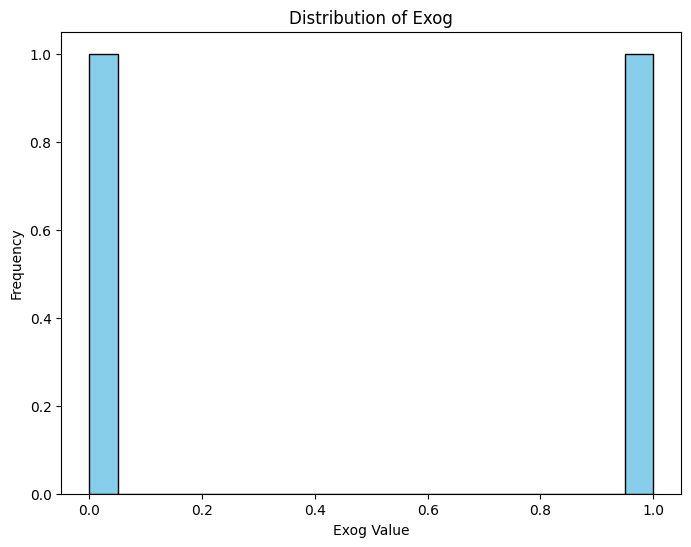

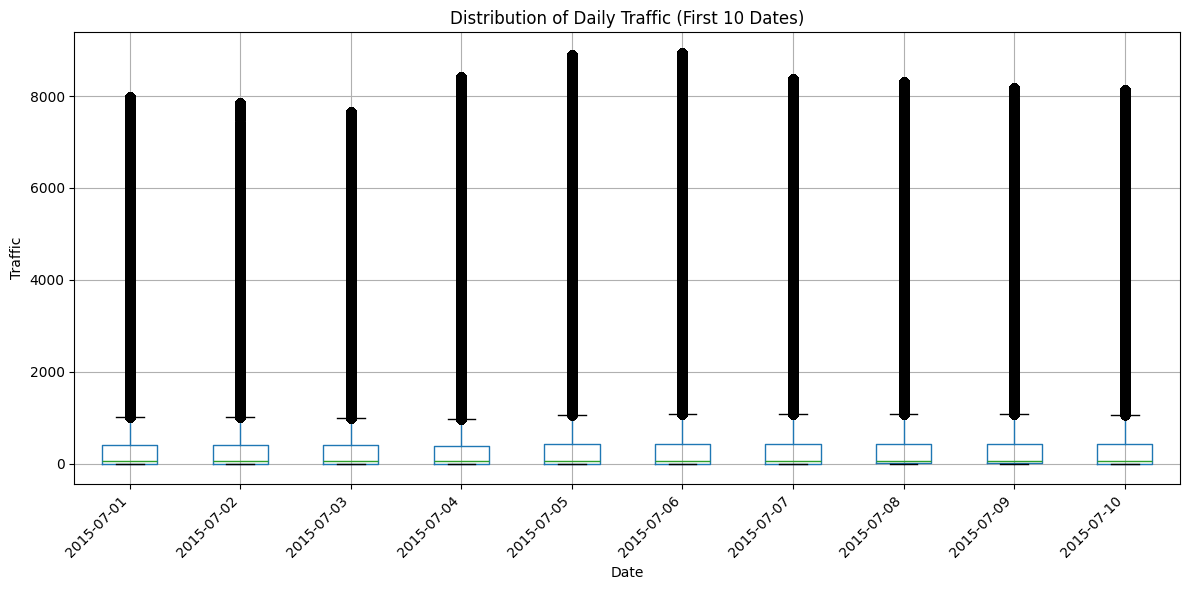

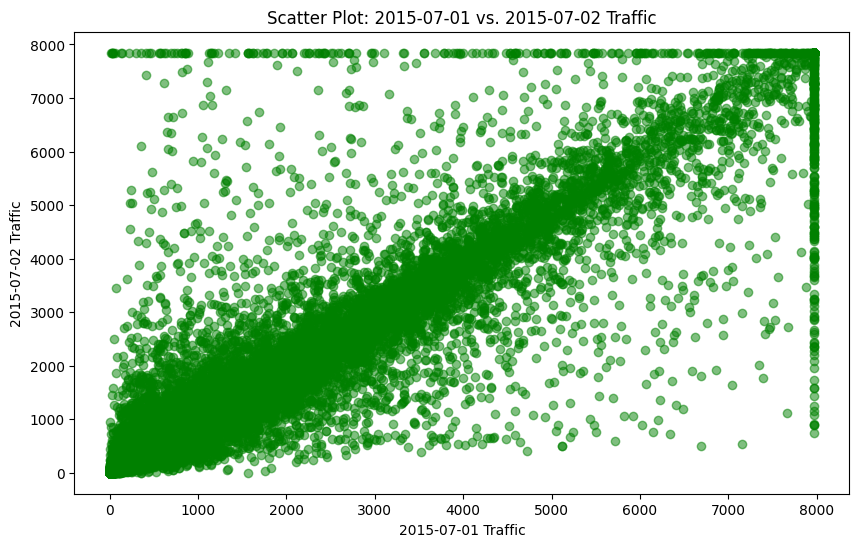

In [5]:
import matplotlib.pyplot as plt

# 1. Histogram for 'Exog' column in df_exog
plt.figure(figsize=(8, 6))
plt.hist(df_exog['Exog'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Exog Value')
plt.ylabel('Frequency')
plt.title('Distribution of Exog')
plt.show()

# 2. Box plots for a sample of date columns in df_train
date_cols_sample = df_train.columns[1:11]  # First 10 date columns
plt.figure(figsize=(12, 6))
df_train[date_cols_sample].boxplot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Distribution of Daily Traffic (First 10 Dates)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# 3. Scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df_train['2015-07-01'], df_train['2015-07-02'], color='green', alpha=0.5)
plt.xlabel('2015-07-01 Traffic')
plt.ylabel('2015-07-02 Traffic')
plt.title('Scatter Plot: 2015-07-01 vs. 2015-07-02 Traffic')
plt.show()

## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* **Data Loading:** Successfully loaded two CSV files, "Exog\_Campaign\_eng.csv" and "train\_1.csv", into pandas DataFrames.  `df_exog` contains a single column "Exog" (all 0 in the first 5 rows). `df_train` contains a "Page" column and daily traffic data from 2015-07-01 to 2016-12-31.
* **Data Exploration:**  `df_train` has a large number of missing values in the daily traffic columns. The daily traffic data exhibits extreme outliers and skewed distributions. The 'Page' column has high cardinality. `df_exog` has no missing values.
* **Data Cleaning:** Missing values in `df_train` were filled with 0. Outliers in daily traffic were winsorized at the 1st and 99th percentiles. Duplicate rows were removed from both dataframes.
* **Data Visualization:**  Histograms, box plots, and scatter plots were generated to visualize the distribution of 'Exog' values, daily traffic patterns, and relationships between traffic on consecutive days.


### Insights or Next Steps
* Investigate the high cardinality of the 'Page' column in `df_train` and consider potential dimensionality reduction techniques.
* Explore the relationship between the 'Exog' variable and the daily traffic patterns to understand its potential influence.
